# Part 1 - Machine Learning

Task 1.1 Data preperation

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import random
import os

df1 = pd.read_csv('AlgerianFF_Region1.csv')
cwd = os.getcwd()
print(cwd)

print (df1)

C:\Users\PC03
     day  month  year  Temperature   RH   Ws  Rain   FFMC  DMC    DC  ISI  \
0      1      6  2012           29   57   18    0.0  65.7  3.4   7.6  1.3   
1      2      6  2012           29   61   13    1.3  64.4  4.1   7.6  1.0   
2      3      6  2012           26   82   22   13.1  47.1  2.5   7.1  0.3   
3      4      6  2012           25   89   13    2.5  28.6  1.3   6.9  0.0   
4      5      6  2012           27   77   16    0.0  64.8  3.0  14.2  1.2   
..   ...    ...   ...          ...  ...  ...    ...   ...  ...   ...  ...   
117   26      9  2012           31   54   11    0.0  82.0  6.0  16.3  2.5   
118   27      9  2012           31   66   11    0.0  85.7  8.3  24.9  4.0   
119   28      9  2012           32   47   14    0.7  77.5  7.1   8.8  1.8   
120   29      9  2012           26   80   16    1.8  47.4  2.9   7.7  0.3   
121   30      9  2012           25   78   14    1.4  45.0  1.9   7.5  0.2   

     BUI  FWI  
0    3.4  0.5  
1    3.9  0.4  
2    2.7  0.1

Splitting data for dataset into inputs & targets for Dataset 1

In [2]:
df1_inputs = df1.values[:,:-1].astype(float)
df1_targets = df1.values[:,-1].astype(float)
print(df1_inputs, df1_targets)

[[1.000e+00 6.000e+00 2.012e+03 ... 7.600e+00 1.300e+00 3.400e+00]
 [2.000e+00 6.000e+00 2.012e+03 ... 7.600e+00 1.000e+00 3.900e+00]
 [3.000e+00 6.000e+00 2.012e+03 ... 7.100e+00 3.000e-01 2.700e+00]
 ...
 [2.800e+01 9.000e+00 2.012e+03 ... 8.800e+00 1.800e+00 6.800e+00]
 [2.900e+01 9.000e+00 2.012e+03 ... 7.700e+00 3.000e-01 3.000e+00]
 [3.000e+01 9.000e+00 2.012e+03 ... 7.500e+00 2.000e-01 2.400e+00]] [ 0.5  0.4  0.1  0.   0.5  2.5  7.2  7.1  0.3  0.9  5.6  7.1  0.2  0.4
  0.1  0.   0.   0.2  1.4  0.4  2.2  2.3  3.8  7.5  8.4 10.6 15.  13.9
  3.9 12.9  0.4  0.3  0.5  1.7  4.9  6.8  3.2  8.   0.6  0.5  2.2  0.9
  3.4  0.8  0.5  0.4  3.6  6.  10.9  4.   8.8  2.8  2.1  1.3  7.3 15.3
 15.3 11.3 11.9 10.7 15.7  0.9  0.8  0.8  3.9  6.1  6.8  8.   2.6  9.9
 11.6 12.1  4.2 10.2 10.6  6.3  4.2 14.6 16.1 17.2 16.8 18.4 20.4 22.3
 20.9 20.3 13.7 13.2 19.9 30.2  4.2  0.3  0.1  0.   0.   0.5  1.7  0.9
  0.6  0.4  0.2  0.3  0.3  0.5  0.   0.1  0.   0.8  5.9  7.7  9.7  6.3
  8.3  2.8  0.7  0.7  0.

In [3]:
import pandas as pd
df2 = pd.read_csv ('AlgerianFF_Region2.csv')
print (df2)

     day  month  year  Temperature   RH   Ws  Rain   FFMC   DMC    DC  ISI  \
0      1      6  2012           32   71   12    0.7  57.1   2.5   8.2  0.6   
1      2      6  2012           30   73   13    4.0  55.7   2.7   7.8  0.6   
2      3      6  2012           29   80   14    2.0  48.7   2.2   7.6  0.3   
3      4      6  2012           30   64   14    0.0  79.4   5.2  15.4  2.2   
4      5      6  2012           32   60   14    0.2  77.1   6.0  17.6  1.8   
..   ...    ...   ...          ...  ...  ...    ...   ...   ...   ...  ...   
117   26      9  2012           30   65   14    0.0  85.4  16.0  44.5  4.5   
118   27      9  2012           28   87   15    4.4  41.1   6.5   8.0  0.1   
119   28      9  2012           27   87   29    0.5  45.9   3.5   7.9  0.4   
120   29      9  2012           24   54   18    0.1  79.7   4.3  15.2  1.7   
121   30      9  2012           24   64   15    0.2  67.3   3.8  16.5  1.2   

      BUI  FWI  
0     2.8  0.2  
1     2.9  0.2  
2     2.6  0

Splitting data for dataset into inputs & targets for Dataset 2

In [4]:
print("Second Dataset \n")
df2_inputs = df2.values[:,:-1].astype(float)
df2_targets = df2.values[:,-1].astype(float)
print(df1_inputs, df1_targets)

Second Dataset 

[[1.000e+00 6.000e+00 2.012e+03 ... 7.600e+00 1.300e+00 3.400e+00]
 [2.000e+00 6.000e+00 2.012e+03 ... 7.600e+00 1.000e+00 3.900e+00]
 [3.000e+00 6.000e+00 2.012e+03 ... 7.100e+00 3.000e-01 2.700e+00]
 ...
 [2.800e+01 9.000e+00 2.012e+03 ... 8.800e+00 1.800e+00 6.800e+00]
 [2.900e+01 9.000e+00 2.012e+03 ... 7.700e+00 3.000e-01 3.000e+00]
 [3.000e+01 9.000e+00 2.012e+03 ... 7.500e+00 2.000e-01 2.400e+00]] [ 0.5  0.4  0.1  0.   0.5  2.5  7.2  7.1  0.3  0.9  5.6  7.1  0.2  0.4
  0.1  0.   0.   0.2  1.4  0.4  2.2  2.3  3.8  7.5  8.4 10.6 15.  13.9
  3.9 12.9  0.4  0.3  0.5  1.7  4.9  6.8  3.2  8.   0.6  0.5  2.2  0.9
  3.4  0.8  0.5  0.4  3.6  6.  10.9  4.   8.8  2.8  2.1  1.3  7.3 15.3
 15.3 11.3 11.9 10.7 15.7  0.9  0.8  0.8  3.9  6.1  6.8  8.   2.6  9.9
 11.6 12.1  4.2 10.2 10.6  6.3  4.2 14.6 16.1 17.2 16.8 18.4 20.4 22.3
 20.9 20.3 13.7 13.2 19.9 30.2  4.2  0.3  0.1  0.   0.   0.5  1.7  0.9
  0.6  0.4  0.2  0.3  0.3  0.5  0.   0.1  0.   0.8  5.9  7.7  9.7  6.3
  8.3  

In [5]:
#combine df1 (dataset1) with df2 (dataset2)
output_data = df1.append(df2)
print(output_data)

     day  month  year  Temperature   RH   Ws  Rain   FFMC   DMC    DC  ISI  \
0      1      6  2012           29   57   18    0.0  65.7   3.4   7.6  1.3   
1      2      6  2012           29   61   13    1.3  64.4   4.1   7.6  1.0   
2      3      6  2012           26   82   22   13.1  47.1   2.5   7.1  0.3   
3      4      6  2012           25   89   13    2.5  28.6   1.3   6.9  0.0   
4      5      6  2012           27   77   16    0.0  64.8   3.0  14.2  1.2   
..   ...    ...   ...          ...  ...  ...    ...   ...   ...   ...  ...   
117   26      9  2012           30   65   14    0.0  85.4  16.0  44.5  4.5   
118   27      9  2012           28   87   15    4.4  41.1   6.5   8.0  0.1   
119   28      9  2012           27   87   29    0.5  45.9   3.5   7.9  0.4   
120   29      9  2012           24   54   18    0.1  79.7   4.3  15.2  1.7   
121   30      9  2012           24   64   15    0.2  67.3   3.8  16.5  1.2   

      BUI  FWI  
0     3.4  0.5  
1     3.9  0.4  
2     2.7  0

Noramlization

In [6]:
from sklearn import preprocessing

df1_inputs = preprocessing.normalize(df1_inputs)
print(df1_inputs)


#Scale the inputs
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df1_inputs)

[[4.96475491e-04 2.97885295e-03 9.98908688e-01 ... 3.77321373e-03
  6.45418138e-04 1.68801667e-03]
 [9.92931309e-04 2.97879393e-03 9.98888896e-01 ... 3.77313897e-03
  4.96465654e-04 1.93621605e-03]
 [1.48914515e-03 2.97829030e-03 9.98720015e-01 ... 3.52431019e-03
  1.48914515e-04 1.34023064e-03]
 ...
 [1.38985254e-02 4.46738316e-03 9.98708325e-01 ... 4.36810798e-03
  8.93476633e-04 3.37535617e-03]
 [1.43947191e-02 4.46732663e-03 9.98695687e-01 ... 3.82204612e-03
  1.48910888e-04 1.48910888e-03]
 [1.48921935e-02 4.46765806e-03 9.98769781e-01 ... 3.72304839e-03
  9.92812903e-05 1.19137548e-03]]


In [7]:
df2_inputs = preprocessing.normalize(df2_inputs)
print(df1_inputs)

[[4.96475491e-04 2.97885295e-03 9.98908688e-01 ... 3.77321373e-03
  6.45418138e-04 1.68801667e-03]
 [9.92931309e-04 2.97879393e-03 9.98888896e-01 ... 3.77313897e-03
  4.96465654e-04 1.93621605e-03]
 [1.48914515e-03 2.97829030e-03 9.98720015e-01 ... 3.52431019e-03
  1.48914515e-04 1.34023064e-03]
 ...
 [1.38985254e-02 4.46738316e-03 9.98708325e-01 ... 4.36810798e-03
  8.93476633e-04 3.37535617e-03]
 [1.43947191e-02 4.46732663e-03 9.98695687e-01 ... 3.82204612e-03
  1.48910888e-04 1.48910888e-03]
 [1.48921935e-02 4.46765806e-03 9.98769781e-01 ... 3.72304839e-03
  9.92812903e-05 1.19137548e-03]]


Task 1.2 Regression 

In [8]:
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor

a) Creation of regression tool for MLPRegressor

In [9]:
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score



In [10]:
regressor1 = MLPRegressor(solver='lbfgs', max_iter=4000)
regressor1.fit(df1, df1_targets)
outputs = regressor1.predict(df1)
print("Mean absolute error: ", mean_absolute_error(df1_targets, outputs))

#calculate MAE
REG1_mae = abs(cross_val_score(regressor1, df1_inputs, df1_targets, scoring="neg_mean_absolute_error"))

Mean absolute error:  0.009671139918956333


c:\users\pc03\appdata\local\programs\python\python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


b) Creation of regression tool for SVR

In [11]:
SVRregressor = SVR()
SVRregressor.fit(df1_inputs, df1_targets)
SVRoutputs = SVRregressor.predict(df1_inputs)

print("Mean absolute error: ", mean_absolute_error(df1_targets, SVRoutputs))

#calculate MAE
RFreg_mae = abs(cross_val_score(SVRregressor, df1_inputs, df1_targets, scoring="neg_mean_absolute_error")) 

Mean absolute error:  4.718814250011162


c) Creation of regressor tool for RandomForestRegressor

In [12]:
RandFor_Regressor = RandomForestRegressor()
RandFor_Regressor.fit(df1_inputs, df1_targets)
outputs =  RandFor_Regressor.predict(df1_inputs)

print("Mean absolute error: ", mean_absolute_error(df1_targets, outputs))

#calculate MAE
RandREG_mae = abs(cross_val_score(RandFor_Regressor, df1_inputs, df1_targets, scoring="neg_mean_absolute_error"))

Mean absolute error:  0.24018852459016288


Task 1.3 Assessment of regression

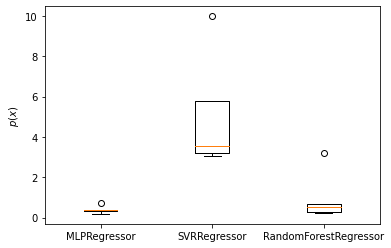

In [13]:
# store mae results into a python array 
import matplotlib.pyplot as plt

maeArray = [REG1_mae, RFreg_mae, RandREG_mae]

REG1 = np.random.rand(100)
REG2 = np.random.randn(100)
REG3 = np.random.rand(100)

plt.figure()
plt.boxplot([REG1_mae, RFreg_mae, RandREG_mae])
plt.xticks([1,2,3], ["MLPRegressor", "SVRRegressor", "RandomForestRegressor"]);
plt.ylabel("$p(x)$")
plt.savefig("boxplot.png", bbox_inches="tight")
plt.show()

# PART 2 – EVOLUTIONARY COMPUTATION

Task 2.1 –Generation of random solutions

In [14]:
distances = pd.read_csv(r'distances.csv', header=None)
print (distances)

       0      1      2      3      4    5    6      7    8      9      10  \
0     0.0   41.2  180.0  392.0  394.0  547  525  151.0  152   53.0  134.0   
1    41.2    0.0  157.0  428.0  430.0  583  560  187.0  187   92.1  169.0   
2   180.0  157.0    0.0  295.0  297.0  451  428  266.0  347  233.0  291.0   
3   392.0  428.0  295.0    0.0   46.5  168  145  414.0  485  372.0  429.0   
4   394.0  430.0  297.0   46.5    0.0  156  127  403.0  487  373.0  431.0   
5   547.0  583.0  451.0  168.0  156.0    0  104  561.0  641  528.0  585.0   
6   525.0  560.0  428.0  145.0  127.0  104    0  539.0  620  506.0  563.0   
7   151.0  187.0  266.0  414.0  403.0  561  539    0.0  215  118.0   80.1   
8   152.0  187.0  347.0  485.0  487.0  641  620  215.0    0  121.0  152.0   
9    53.0   92.1  233.0  372.0  373.0  528  506  118.0  121    0.0  101.0   
10  134.0  169.0  291.0  429.0  431.0  585  563   80.1  152  101.0    0.0   
11  266.0  302.0  307.0  376.0  373.0  533  510  118.0  359  246.0  202.0   

In [15]:
cities = open(r'cities.txt')
test = cities.read().splitlines()
print(test)

['Cardiff', 'Swansea', 'Bangor', 'Glasgow', 'Edinburgh', 'Inverness', 'Aberdeen', 'London', 'Plymouth', 'Bristol', 'Southampton', 'Norwich', 'Birmingham', 'Manchester', 'Liverpool', 'Cambridge', 'Brighton', 'Oxford', 'Newcastle', 'Leeds']


In [16]:
import random
# dislaying distances

def randRoute(distances):
    route = list(range(len(distances)))
    #shuffeling cities
    random.shuffle(route)
    return route
print(randRoute(distances)) # creating a random route


#working out length of route

def route_length(route, dist):
    length = 0 #sets the varaible 'length' to zero
    for i in range(len(route)): # looks through the array
       length += dist.iat[route[i-1], route[i]] # for how many cities are in the route, get distance of first city and next city
    
    return length

x = randRoute(distances)
y = route_length(x, distances)
print(x)
print(y)
#x = randRoute(distances)
#print (x)
#y = route_length(x, distances)
#print(y)

[1, 7, 0, 5, 3, 12, 9, 4, 13, 15, 17, 11, 18, 10, 14, 8, 16, 2, 6, 19]
[8, 7, 16, 17, 13, 10, 4, 5, 12, 14, 15, 9, 18, 2, 11, 6, 3, 1, 19, 0]
4845.9


Task 2.2 –Algorithm implementation 

2.2.1 - Creation of Ruin and Recreate function

In [17]:
def ruinAndRecreate(iterations):
    
    RandList = []
    
    bestRoute = randRoute(distances)
    bestRouteLength = route_length(bestRoute, distances)
    
    for i in range(iterations):
        route2 = randRoute(distances)
        print(route2)
        routelength2 = route_length(route2, distances)
        if routelength2 < bestRouteLength:
            bestRouteLength = routelength2
            bestRoute = route2
        RandList.append(bestRouteLength) #iterates through and generates a new route , if it was better than previous routes it becomes the best route is kept till the next iteration 
    return RandList
print(ruinAndRecreate(30))

[11, 14, 19, 4, 1, 16, 3, 15, 5, 18, 6, 9, 0, 17, 7, 10, 2, 8, 12, 13]
[10, 8, 6, 16, 5, 1, 12, 11, 3, 19, 18, 17, 7, 2, 14, 0, 4, 15, 9, 13]
[13, 12, 7, 5, 11, 8, 18, 10, 15, 0, 2, 17, 1, 3, 16, 14, 19, 6, 9, 4]
[6, 13, 15, 5, 14, 10, 11, 18, 8, 12, 4, 1, 7, 9, 16, 3, 2, 0, 17, 19]
[16, 18, 7, 14, 15, 9, 3, 12, 1, 19, 2, 8, 17, 5, 11, 4, 6, 0, 13, 10]
[2, 17, 3, 4, 14, 0, 15, 5, 10, 8, 18, 16, 7, 6, 1, 19, 9, 13, 12, 11]
[14, 17, 4, 0, 16, 2, 8, 1, 6, 15, 18, 3, 9, 19, 10, 13, 11, 12, 7, 5]
[0, 3, 14, 2, 17, 1, 4, 8, 18, 9, 13, 15, 12, 5, 7, 11, 10, 6, 16, 19]
[7, 19, 16, 1, 2, 8, 6, 18, 17, 15, 5, 13, 4, 12, 11, 9, 0, 14, 10, 3]
[3, 11, 13, 16, 1, 17, 0, 7, 12, 19, 8, 14, 2, 18, 15, 10, 9, 4, 6, 5]
[9, 1, 17, 0, 2, 14, 3, 13, 7, 6, 8, 15, 19, 5, 18, 10, 4, 16, 12, 11]
[10, 17, 2, 16, 1, 18, 5, 9, 15, 6, 3, 14, 11, 4, 13, 7, 12, 19, 0, 8]
[3, 6, 10, 19, 1, 4, 14, 15, 8, 0, 9, 7, 2, 18, 11, 12, 16, 13, 17, 5]
[1, 9, 4, 11, 14, 0, 16, 6, 8, 3, 15, 19, 13, 10, 2, 7, 5, 18, 17, 12]
[5, 13

2.2.1 - Creation of swap function

In [18]:
def swap(iterations):
    print("swap Function") # for readability
    
    SwapList = []
    
    bestRoute = randRoute(distances)
    bestRouteLength = route_length(bestRoute, distances)
    
    for i in range(iterations):
        newRoute = bestRoute.copy() # copies the values of bestRoute
        newRouteLength = route_length(newRoute, distances) #records the length of the new route, and gives something to compare what route is more fitter out of the bestroute and newroute
        
        print("Best route = ", bestRoute, ": Length = ", bestRouteLength) # make sure it works
        
        newRoutePosition1 = random.randint(0, max(newRoute))
        newRoutePosition2 = random.randint(0, max(newRoute))
        
        
        newRoute[newRoutePosition1], newRoute[newRoutePosition2] = newRoute[newRoutePosition2], newRoute[newRoutePosition1]
        print("New Route = ", newRoute, ": Length = ", newRouteLength)
        newRouteLength = route_length(newRoute, distances)
        
        if(bestRouteLength > newRouteLength):
            bestRoute = newRoute
            bestRouteLength = newRouteLength
        else:
            bestRoute = bestRoute
            bestRouteLength = bestRouteLength
        SwapList.append(bestRouteLength)
        print("Best Route = ", bestRoute, ": Length = ", bestRouteLength)
        
    print("Best Route = ", route_length(bestRoute, distances))
        
    
    return SwapList

print(swap(30))

swap Function
Best route =  [18, 1, 4, 7, 6, 11, 19, 15, 13, 8, 2, 0, 17, 3, 5, 16, 9, 12, 10, 14] : Length =  5627.5
New Route =  [18, 1, 4, 7, 6, 11, 19, 15, 3, 8, 2, 0, 17, 13, 5, 16, 9, 12, 10, 14] : Length =  5627.5
Best Route =  [18, 1, 4, 7, 6, 11, 19, 15, 13, 8, 2, 0, 17, 3, 5, 16, 9, 12, 10, 14] : Length =  5627.5
Best route =  [18, 1, 4, 7, 6, 11, 19, 15, 13, 8, 2, 0, 17, 3, 5, 16, 9, 12, 10, 14] : Length =  5627.5
New Route =  [18, 13, 4, 7, 6, 11, 19, 15, 1, 8, 2, 0, 17, 3, 5, 16, 9, 12, 10, 14] : Length =  5627.5
Best Route =  [18, 13, 4, 7, 6, 11, 19, 15, 1, 8, 2, 0, 17, 3, 5, 16, 9, 12, 10, 14] : Length =  5168.5
Best route =  [18, 13, 4, 7, 6, 11, 19, 15, 1, 8, 2, 0, 17, 3, 5, 16, 9, 12, 10, 14] : Length =  5168.5
New Route =  [18, 1, 4, 7, 6, 11, 19, 15, 13, 8, 2, 0, 17, 3, 5, 16, 9, 12, 10, 14] : Length =  5168.5
Best Route =  [18, 13, 4, 7, 6, 11, 19, 15, 1, 8, 2, 0, 17, 3, 5, 16, 9, 12, 10, 14] : Length =  5168.5
Best route =  [18, 13, 4, 7, 6, 11, 19, 15, 1, 8, 2, 

Task 2.3 – Visualisation of results

swap Function
Best route =  [5, 8, 15, 2, 19, 4, 14, 0, 16, 3, 7, 1, 13, 10, 17, 12, 6, 11, 18, 9] : Length =  5831.4
New Route =  [5, 8, 15, 2, 9, 4, 14, 0, 16, 3, 7, 1, 13, 10, 17, 12, 6, 11, 18, 19] : Length =  5831.4
Best Route =  [5, 8, 15, 2, 9, 4, 14, 0, 16, 3, 7, 1, 13, 10, 17, 12, 6, 11, 18, 19] : Length =  5726.599999999999
Best route =  [5, 8, 15, 2, 9, 4, 14, 0, 16, 3, 7, 1, 13, 10, 17, 12, 6, 11, 18, 19] : Length =  5726.599999999999
New Route =  [5, 8, 15, 2, 9, 4, 14, 17, 16, 3, 7, 1, 13, 10, 0, 12, 6, 11, 18, 19] : Length =  5726.599999999999
Best Route =  [5, 8, 15, 2, 9, 4, 14, 0, 16, 3, 7, 1, 13, 10, 17, 12, 6, 11, 18, 19] : Length =  5726.599999999999
Best route =  [5, 8, 15, 2, 9, 4, 14, 0, 16, 3, 7, 1, 13, 10, 17, 12, 6, 11, 18, 19] : Length =  5726.599999999999
New Route =  [5, 8, 15, 2, 9, 4, 14, 0, 16, 3, 7, 1, 13, 10, 6, 12, 17, 11, 18, 19] : Length =  5726.599999999999
Best Route =  [5, 8, 15, 2, 9, 4, 14, 0, 16, 3, 7, 1, 13, 10, 17, 12, 6, 11, 18, 19] : Leng

New Route =  [10, 16, 15, 11, 9, 0, 14, 2, 5, 3, 7, 8, 6, 1, 13, 12, 17, 4, 18, 19] : Length =  3741.7
Best Route =  [10, 16, 15, 11, 9, 0, 14, 2, 5, 3, 7, 8, 17, 1, 13, 12, 6, 4, 18, 19] : Length =  3741.7
Best route =  [10, 16, 15, 11, 9, 0, 14, 2, 5, 3, 7, 8, 17, 1, 13, 12, 6, 4, 18, 19] : Length =  3741.7
New Route =  [10, 16, 1, 11, 9, 0, 14, 2, 5, 3, 7, 8, 17, 15, 13, 12, 6, 4, 18, 19] : Length =  3741.7
Best Route =  [10, 16, 15, 11, 9, 0, 14, 2, 5, 3, 7, 8, 17, 1, 13, 12, 6, 4, 18, 19] : Length =  3741.7
Best route =  [10, 16, 15, 11, 9, 0, 14, 2, 5, 3, 7, 8, 17, 1, 13, 12, 6, 4, 18, 19] : Length =  3741.7
New Route =  [10, 16, 15, 11, 9, 0, 14, 2, 5, 3, 7, 8, 17, 1, 13, 4, 6, 12, 18, 19] : Length =  3741.7
Best Route =  [10, 16, 15, 11, 9, 0, 14, 2, 5, 3, 7, 8, 17, 1, 13, 12, 6, 4, 18, 19] : Length =  3741.7
Best route =  [10, 16, 15, 11, 9, 0, 14, 2, 5, 3, 7, 8, 17, 1, 13, 12, 6, 4, 18, 19] : Length =  3741.7
New Route =  [10, 5, 15, 11, 9, 0, 14, 2, 16, 3, 7, 8, 17, 1, 13, 1

[17, 7, 18, 3, 15, 12, 4, 13, 2, 19, 10, 16, 0, 14, 9, 8, 1, 11, 5, 6]
[16, 0, 17, 9, 13, 14, 7, 10, 15, 4, 12, 2, 5, 3, 1, 11, 18, 8, 6, 19]
[12, 5, 4, 13, 14, 10, 7, 8, 0, 1, 19, 9, 17, 3, 6, 2, 16, 18, 15, 11]
[17, 7, 9, 1, 2, 4, 19, 18, 12, 6, 10, 0, 14, 11, 16, 13, 3, 8, 15, 5]
[6, 18, 2, 8, 13, 10, 3, 5, 15, 0, 14, 9, 11, 1, 19, 4, 7, 17, 16, 12]
[1, 17, 15, 13, 8, 2, 18, 16, 19, 6, 7, 4, 14, 11, 9, 3, 10, 0, 12, 5]
[0, 16, 18, 10, 2, 6, 17, 11, 7, 13, 8, 15, 5, 19, 3, 1, 12, 4, 9, 14]
[17, 5, 12, 14, 6, 2, 13, 3, 16, 0, 19, 9, 15, 18, 1, 11, 4, 10, 7, 8]
[16, 4, 7, 11, 3, 1, 6, 13, 10, 12, 17, 0, 9, 15, 18, 14, 19, 5, 8, 2]
[13, 3, 2, 5, 7, 9, 14, 19, 10, 11, 6, 8, 18, 17, 4, 1, 0, 12, 15, 16]
[3, 7, 9, 10, 15, 2, 18, 0, 17, 5, 14, 11, 8, 6, 19, 4, 12, 16, 13, 1]
[1, 18, 12, 13, 0, 16, 10, 2, 19, 7, 14, 8, 3, 4, 17, 6, 9, 5, 15, 11]
[2, 18, 0, 7, 16, 8, 15, 6, 4, 9, 1, 12, 19, 11, 5, 3, 13, 10, 17, 14]
[16, 3, 7, 18, 11, 0, 2, 12, 17, 13, 15, 6, 14, 10, 1, 8, 5, 9, 19, 4]
[9, 0,

New Route =  [6, 5, 14, 7, 11, 15, 16, 12, 8, 2, 9, 19, 13, 3, 1, 17, 18, 4, 10, 0] : Length =  4242.5
Best Route =  [6, 5, 9, 7, 11, 15, 16, 12, 8, 2, 14, 19, 13, 3, 1, 17, 18, 4, 10, 0] : Length =  4242.5
Best route =  [6, 5, 9, 7, 11, 15, 16, 12, 8, 2, 14, 19, 13, 3, 1, 17, 18, 4, 10, 0] : Length =  4242.5
New Route =  [6, 5, 9, 7, 11, 15, 16, 12, 8, 2, 14, 13, 19, 3, 1, 17, 18, 4, 10, 0] : Length =  4242.5
Best Route =  [6, 5, 9, 7, 11, 15, 16, 12, 8, 2, 14, 13, 19, 3, 1, 17, 18, 4, 10, 0] : Length =  4209.9
Best route =  [6, 5, 9, 7, 11, 15, 16, 12, 8, 2, 14, 13, 19, 3, 1, 17, 18, 4, 10, 0] : Length =  4209.9
New Route =  [6, 5, 9, 7, 11, 10, 16, 12, 8, 2, 14, 13, 19, 3, 1, 17, 18, 4, 15, 0] : Length =  4209.9
Best Route =  [6, 5, 9, 7, 11, 15, 16, 12, 8, 2, 14, 13, 19, 3, 1, 17, 18, 4, 10, 0] : Length =  4209.9
Best route =  [6, 5, 9, 7, 11, 15, 16, 12, 8, 2, 14, 13, 19, 3, 1, 17, 18, 4, 10, 0] : Length =  4209.9
New Route =  [6, 5, 9, 7, 11, 15, 16, 18, 8, 2, 14, 13, 19, 3, 1, 1

New Route =  [1, 17, 4, 12, 18, 16, 13, 19, 5, 8, 10, 11, 14, 0, 9, 3, 6, 7, 15, 2] : Length =  5230.6
Best Route =  [1, 17, 4, 12, 18, 16, 13, 19, 5, 8, 10, 11, 14, 0, 9, 3, 6, 7, 15, 2] : Length =  5083.6
Best route =  [1, 17, 4, 12, 18, 16, 13, 19, 5, 8, 10, 11, 14, 0, 9, 3, 6, 7, 15, 2] : Length =  5083.6
New Route =  [1, 17, 4, 12, 18, 16, 13, 19, 5, 8, 10, 11, 14, 0, 7, 3, 6, 9, 15, 2] : Length =  5083.6
Best Route =  [1, 17, 4, 12, 18, 16, 13, 19, 5, 8, 10, 11, 14, 0, 9, 3, 6, 7, 15, 2] : Length =  5083.6
Best route =  [1, 17, 4, 12, 18, 16, 13, 19, 5, 8, 10, 11, 14, 0, 9, 3, 6, 7, 15, 2] : Length =  5083.6
New Route =  [1, 17, 4, 12, 18, 2, 13, 19, 5, 8, 10, 11, 14, 0, 9, 3, 6, 7, 15, 16] : Length =  5083.6
Best Route =  [1, 17, 4, 12, 18, 2, 13, 19, 5, 8, 10, 11, 14, 0, 9, 3, 6, 7, 15, 16] : Length =  4753.9
Best route =  [1, 17, 4, 12, 18, 2, 13, 19, 5, 8, 10, 11, 14, 0, 9, 3, 6, 7, 15, 16] : Length =  4753.9
New Route =  [14, 17, 4, 12, 18, 2, 13, 19, 5, 8, 10, 11, 1, 0, 9, 

New Route =  [18, 9, 1, 17, 11, 4, 7, 19, 0, 10, 3, 12, 14, 6, 13, 5, 8, 16, 15, 2] : Length =  5445.5
Best Route =  [18, 9, 1, 17, 11, 4, 7, 19, 0, 10, 3, 12, 14, 6, 13, 5, 8, 16, 15, 2] : Length =  5390.5
Best route =  [18, 9, 1, 17, 11, 4, 7, 19, 0, 10, 3, 12, 14, 6, 13, 5, 8, 16, 15, 2] : Length =  5390.5
New Route =  [18, 9, 1, 5, 11, 4, 7, 19, 0, 10, 3, 12, 14, 6, 13, 17, 8, 16, 15, 2] : Length =  5390.5
Best Route =  [18, 9, 1, 17, 11, 4, 7, 19, 0, 10, 3, 12, 14, 6, 13, 5, 8, 16, 15, 2] : Length =  5390.5
Best route =  [18, 9, 1, 17, 11, 4, 7, 19, 0, 10, 3, 12, 14, 6, 13, 5, 8, 16, 15, 2] : Length =  5390.5
New Route =  [18, 9, 14, 17, 11, 4, 7, 19, 0, 10, 3, 12, 1, 6, 13, 5, 8, 16, 15, 2] : Length =  5390.5
Best Route =  [18, 9, 1, 17, 11, 4, 7, 19, 0, 10, 3, 12, 14, 6, 13, 5, 8, 16, 15, 2] : Length =  5390.5
Best route =  [18, 9, 1, 17, 11, 4, 7, 19, 0, 10, 3, 12, 14, 6, 13, 5, 8, 16, 15, 2] : Length =  5390.5
New Route =  [18, 9, 1, 17, 11, 4, 7, 19, 0, 10, 15, 12, 14, 6, 13,

New Route =  [0, 17, 16, 2, 9, 14, 15, 18, 19, 11, 1, 3, 8, 10, 13, 12, 6, 4, 5, 7] : Length =  4855.4
Best Route =  [0, 17, 16, 2, 9, 14, 15, 18, 19, 11, 1, 3, 8, 10, 13, 12, 6, 4, 5, 7] : Length =  4754.4
Best route =  [0, 17, 16, 2, 9, 14, 15, 18, 19, 11, 1, 3, 8, 10, 13, 12, 6, 4, 5, 7] : Length =  4754.4
New Route =  [0, 9, 16, 2, 17, 14, 15, 18, 19, 11, 1, 3, 8, 10, 13, 12, 6, 4, 5, 7] : Length =  4754.4
Best Route =  [0, 9, 16, 2, 17, 14, 15, 18, 19, 11, 1, 3, 8, 10, 13, 12, 6, 4, 5, 7] : Length =  4712.4
Best route =  [0, 9, 16, 2, 17, 14, 15, 18, 19, 11, 1, 3, 8, 10, 13, 12, 6, 4, 5, 7] : Length =  4712.4
New Route =  [0, 9, 16, 2, 17, 14, 15, 18, 19, 11, 1, 3, 10, 8, 13, 12, 6, 4, 5, 7] : Length =  4712.4
Best Route =  [0, 9, 16, 2, 17, 14, 15, 18, 19, 11, 1, 3, 8, 10, 13, 12, 6, 4, 5, 7] : Length =  4712.4
Best route =  [0, 9, 16, 2, 17, 14, 15, 18, 19, 11, 1, 3, 8, 10, 13, 12, 6, 4, 5, 7] : Length =  4712.4
New Route =  [0, 9, 16, 2, 17, 14, 15, 18, 12, 11, 1, 3, 8, 10, 13,

Best route =  [8, 7, 16, 12, 4, 18, 13, 1, 6, 3, 5, 2, 19, 17, 11, 14, 0, 10, 15, 9] : Length =  4032.5
New Route =  [5, 7, 16, 12, 4, 18, 13, 1, 6, 3, 8, 2, 19, 17, 11, 14, 0, 10, 15, 9] : Length =  4032.5
Best Route =  [8, 7, 16, 12, 4, 18, 13, 1, 6, 3, 5, 2, 19, 17, 11, 14, 0, 10, 15, 9] : Length =  4032.5
Best route =  [8, 7, 16, 12, 4, 18, 13, 1, 6, 3, 5, 2, 19, 17, 11, 14, 0, 10, 15, 9] : Length =  4032.5
New Route =  [8, 7, 16, 12, 4, 18, 13, 1, 6, 11, 5, 2, 19, 17, 3, 14, 0, 10, 15, 9] : Length =  4032.5
Best Route =  [8, 7, 16, 12, 4, 18, 13, 1, 6, 3, 5, 2, 19, 17, 11, 14, 0, 10, 15, 9] : Length =  4032.5
Best route =  [8, 7, 16, 12, 4, 18, 13, 1, 6, 3, 5, 2, 19, 17, 11, 14, 0, 10, 15, 9] : Length =  4032.5
New Route =  [8, 7, 16, 12, 4, 18, 13, 1, 6, 3, 5, 11, 19, 17, 2, 14, 0, 10, 15, 9] : Length =  4032.5
Best Route =  [8, 7, 16, 12, 4, 18, 13, 1, 6, 3, 5, 11, 19, 17, 2, 14, 0, 10, 15, 9] : Length =  4026.5
Best route =  [8, 7, 16, 12, 4, 18, 13, 1, 6, 3, 5, 11, 19, 17, 2, 

New Route =  [4, 13, 3, 2, 17, 14, 19, 12, 7, 10, 18, 5, 6, 9, 1, 8, 15, 11, 16, 0] : Length =  3699.0
Best Route =  [9, 13, 3, 2, 17, 14, 19, 12, 7, 10, 18, 5, 6, 4, 1, 8, 15, 11, 16, 0] : Length =  3699.0
Best route =  [9, 13, 3, 2, 17, 14, 19, 12, 7, 10, 18, 5, 6, 4, 1, 8, 15, 11, 16, 0] : Length =  3699.0
New Route =  [9, 13, 3, 2, 17, 14, 19, 12, 7, 10, 5, 18, 6, 4, 1, 8, 15, 11, 16, 0] : Length =  3699.0
Best Route =  [9, 13, 3, 2, 17, 14, 19, 12, 7, 10, 18, 5, 6, 4, 1, 8, 15, 11, 16, 0] : Length =  3699.0
Best route =  [9, 13, 3, 2, 17, 14, 19, 12, 7, 10, 18, 5, 6, 4, 1, 8, 15, 11, 16, 0] : Length =  3699.0
New Route =  [9, 13, 3, 2, 17, 14, 19, 12, 7, 10, 18, 5, 6, 16, 1, 8, 15, 11, 4, 0] : Length =  3699.0
Best Route =  [9, 13, 3, 2, 17, 14, 19, 12, 7, 10, 18, 5, 6, 4, 1, 8, 15, 11, 16, 0] : Length =  3699.0
Best route =  [9, 13, 3, 2, 17, 14, 19, 12, 7, 10, 18, 5, 6, 4, 1, 8, 15, 11, 16, 0] : Length =  3699.0
New Route =  [9, 16, 3, 2, 17, 14, 19, 12, 7, 10, 18, 5, 6, 4, 1, 8

Best Route =  [18, 10, 16, 15, 13, 17, 0, 1, 7, 9, 11, 6, 4, 2, 12, 8, 5, 14, 3, 19] : Length =  4425.8
Best route =  [18, 10, 16, 15, 13, 17, 0, 1, 7, 9, 11, 6, 4, 2, 12, 8, 5, 14, 3, 19] : Length =  4425.8
New Route =  [18, 10, 16, 15, 3, 17, 0, 1, 7, 9, 11, 6, 4, 2, 12, 8, 5, 14, 13, 19] : Length =  4425.8
Best Route =  [18, 10, 16, 15, 13, 17, 0, 1, 7, 9, 11, 6, 4, 2, 12, 8, 5, 14, 3, 19] : Length =  4425.8
Best route =  [18, 10, 16, 15, 13, 17, 0, 1, 7, 9, 11, 6, 4, 2, 12, 8, 5, 14, 3, 19] : Length =  4425.8
New Route =  [18, 10, 14, 15, 13, 17, 0, 1, 7, 9, 11, 6, 4, 2, 12, 8, 5, 16, 3, 19] : Length =  4425.8
Best Route =  [18, 10, 16, 15, 13, 17, 0, 1, 7, 9, 11, 6, 4, 2, 12, 8, 5, 14, 3, 19] : Length =  4425.8
Best route =  [18, 10, 16, 15, 13, 17, 0, 1, 7, 9, 11, 6, 4, 2, 12, 8, 5, 14, 3, 19] : Length =  4425.8
New Route =  [18, 8, 16, 15, 13, 17, 0, 1, 7, 9, 11, 6, 4, 2, 12, 10, 5, 14, 3, 19] : Length =  4425.8
Best Route =  [18, 10, 16, 15, 13, 17, 0, 1, 7, 9, 11, 6, 4, 2, 12,

Best Route =  [19, 13, 9, 17, 14, 3, 5, 6, 2, 7, 15, 10, 8, 0, 12, 11, 1, 16, 18, 4] : Length =  3659.8
Best route =  [19, 13, 9, 17, 14, 3, 5, 6, 2, 7, 15, 10, 8, 0, 12, 11, 1, 16, 18, 4] : Length =  3659.8
New Route =  [19, 13, 7, 17, 14, 3, 5, 6, 2, 9, 15, 10, 8, 0, 12, 11, 1, 16, 18, 4] : Length =  3659.8
Best Route =  [19, 13, 9, 17, 14, 3, 5, 6, 2, 7, 15, 10, 8, 0, 12, 11, 1, 16, 18, 4] : Length =  3659.8
Best route =  [19, 13, 9, 17, 14, 3, 5, 6, 2, 7, 15, 10, 8, 0, 12, 11, 1, 16, 18, 4] : Length =  3659.8
New Route =  [19, 13, 9, 17, 14, 12, 5, 6, 2, 7, 15, 10, 8, 0, 3, 11, 1, 16, 18, 4] : Length =  3659.8
Best Route =  [19, 13, 9, 17, 14, 3, 5, 6, 2, 7, 15, 10, 8, 0, 12, 11, 1, 16, 18, 4] : Length =  3659.8
Best route =  [19, 13, 9, 17, 14, 3, 5, 6, 2, 7, 15, 10, 8, 0, 12, 11, 1, 16, 18, 4] : Length =  3659.8
New Route =  [19, 13, 9, 17, 14, 3, 5, 2, 6, 7, 15, 10, 8, 0, 12, 11, 1, 16, 18, 4] : Length =  3659.8
Best Route =  [19, 13, 9, 17, 14, 3, 5, 6, 2, 7, 15, 10, 8, 0, 12, 

New Route =  [13, 9, 18, 15, 11, 1, 14, 19, 7, 16, 0, 17, 4, 6, 8, 2, 12, 10, 5, 3] : Length =  4401.4
Best Route =  [13, 9, 18, 15, 11, 1, 14, 19, 7, 16, 0, 17, 4, 6, 12, 2, 8, 10, 5, 3] : Length =  4401.4
Best route =  [13, 9, 18, 15, 11, 1, 14, 19, 7, 16, 0, 17, 4, 6, 12, 2, 8, 10, 5, 3] : Length =  4401.4
New Route =  [13, 9, 18, 15, 11, 1, 14, 19, 7, 16, 0, 5, 4, 6, 12, 2, 8, 10, 17, 3] : Length =  4401.4
Best Route =  [13, 9, 18, 15, 11, 1, 14, 19, 7, 16, 0, 5, 4, 6, 12, 2, 8, 10, 17, 3] : Length =  4297.3
Best route =  [13, 9, 18, 15, 11, 1, 14, 19, 7, 16, 0, 5, 4, 6, 12, 2, 8, 10, 17, 3] : Length =  4297.3
New Route =  [13, 11, 18, 15, 9, 1, 14, 19, 7, 16, 0, 5, 4, 6, 12, 2, 8, 10, 17, 3] : Length =  4297.3
Best Route =  [13, 11, 18, 15, 9, 1, 14, 19, 7, 16, 0, 5, 4, 6, 12, 2, 8, 10, 17, 3] : Length =  4200.5
Best route =  [13, 11, 18, 15, 9, 1, 14, 19, 7, 16, 0, 5, 4, 6, 12, 2, 8, 10, 17, 3] : Length =  4200.5
New Route =  [17, 11, 18, 15, 9, 1, 14, 19, 7, 16, 0, 5, 4, 6, 12, 

Best route =  [2, 10, 9, 15, 17, 8, 3, 18, 4, 7, 12, 13, 16, 1, 0, 14, 11, 19, 6, 5] : Length =  4301.4
New Route =  [2, 10, 9, 12, 17, 8, 3, 18, 4, 7, 15, 13, 16, 1, 0, 14, 11, 19, 6, 5] : Length =  4301.4
Best Route =  [2, 10, 9, 12, 17, 8, 3, 18, 4, 7, 15, 13, 16, 1, 0, 14, 11, 19, 6, 5] : Length =  4241.2
Best route =  [2, 10, 9, 12, 17, 8, 3, 18, 4, 7, 15, 13, 16, 1, 0, 14, 11, 19, 6, 5] : Length =  4241.2
New Route =  [2, 10, 17, 12, 9, 8, 3, 18, 4, 7, 15, 13, 16, 1, 0, 14, 11, 19, 6, 5] : Length =  4241.2
Best Route =  [2, 10, 17, 12, 9, 8, 3, 18, 4, 7, 15, 13, 16, 1, 0, 14, 11, 19, 6, 5] : Length =  4122.1
Best route =  [2, 10, 17, 12, 9, 8, 3, 18, 4, 7, 15, 13, 16, 1, 0, 14, 11, 19, 6, 5] : Length =  4122.1
New Route =  [2, 10, 17, 9, 12, 8, 3, 18, 4, 7, 15, 13, 16, 1, 0, 14, 11, 19, 6, 5] : Length =  4122.1
Best Route =  [2, 10, 17, 12, 9, 8, 3, 18, 4, 7, 15, 13, 16, 1, 0, 14, 11, 19, 6, 5] : Length =  4122.1
Best route =  [2, 10, 17, 12, 9, 8, 3, 18, 4, 7, 15, 13, 16, 1, 0, 

New Route =  [19, 2, 12, 10, 7, 0, 3, 1, 15, 11, 13, 18, 16, 17, 9, 8, 5, 14, 6, 4] : Length =  4547.2
Best Route =  [19, 2, 12, 10, 7, 0, 3, 1, 15, 11, 13, 18, 16, 17, 9, 8, 5, 14, 6, 4] : Length =  4526.2
Best route =  [19, 2, 12, 10, 7, 0, 3, 1, 15, 11, 13, 18, 16, 17, 9, 8, 5, 14, 6, 4] : Length =  4526.2
New Route =  [19, 2, 12, 10, 7, 0, 3, 1, 15, 11, 13, 18, 16, 17, 9, 8, 5, 14, 6, 4] : Length =  4526.2
Best Route =  [19, 2, 12, 10, 7, 0, 3, 1, 15, 11, 13, 18, 16, 17, 9, 8, 5, 14, 6, 4] : Length =  4526.2
Best route =  [19, 2, 12, 10, 7, 0, 3, 1, 15, 11, 13, 18, 16, 17, 9, 8, 5, 14, 6, 4] : Length =  4526.2
New Route =  [19, 2, 12, 10, 4, 0, 3, 1, 15, 11, 13, 18, 16, 17, 9, 8, 5, 14, 6, 7] : Length =  4526.2
Best Route =  [19, 2, 12, 10, 7, 0, 3, 1, 15, 11, 13, 18, 16, 17, 9, 8, 5, 14, 6, 4] : Length =  4526.2
Best route =  [19, 2, 12, 10, 7, 0, 3, 1, 15, 11, 13, 18, 16, 17, 9, 8, 5, 14, 6, 4] : Length =  4526.2
New Route =  [19, 2, 12, 10, 8, 0, 3, 1, 15, 11, 13, 18, 16, 17, 9,

New Route =  [5, 4, 11, 12, 15, 10, 17, 0, 14, 19, 2, 1, 6, 3, 13, 8, 18, 9, 7, 16] : Length =  4317.2
Best Route =  [5, 4, 11, 12, 15, 10, 17, 2, 14, 19, 0, 1, 6, 3, 13, 8, 18, 9, 7, 16] : Length =  4317.2
Best route =  [5, 4, 11, 12, 15, 10, 17, 2, 14, 19, 0, 1, 6, 3, 13, 8, 18, 9, 7, 16] : Length =  4317.2
New Route =  [5, 4, 11, 12, 15, 10, 17, 2, 14, 19, 0, 1, 6, 3, 13, 8, 16, 9, 7, 18] : Length =  4317.2
Best Route =  [5, 4, 11, 12, 15, 10, 17, 2, 14, 19, 0, 1, 6, 3, 13, 8, 16, 9, 7, 18] : Length =  3874.7
Best route =  [5, 4, 11, 12, 15, 10, 17, 2, 14, 19, 0, 1, 6, 3, 13, 8, 16, 9, 7, 18] : Length =  3874.7
New Route =  [5, 4, 11, 19, 15, 10, 17, 2, 14, 12, 0, 1, 6, 3, 13, 8, 16, 9, 7, 18] : Length =  3874.7
Best Route =  [5, 4, 11, 19, 15, 10, 17, 2, 14, 12, 0, 1, 6, 3, 13, 8, 16, 9, 7, 18] : Length =  3858.5
Best route =  [5, 4, 11, 19, 15, 10, 17, 2, 14, 12, 0, 1, 6, 3, 13, 8, 16, 9, 7, 18] : Length =  3858.5
New Route =  [5, 19, 11, 4, 15, 10, 17, 2, 14, 12, 0, 1, 6, 3, 13, 

New Route =  [17, 10, 3, 13, 18, 5, 9, 15, 7, 8, 12, 19, 4, 14, 1, 6, 16, 11, 2, 0] : Length =  5067.0
Best Route =  [17, 10, 3, 13, 18, 5, 9, 15, 7, 8, 12, 19, 4, 14, 1, 6, 16, 11, 2, 0] : Length =  5001.9
Best route =  [17, 10, 3, 13, 18, 5, 9, 15, 7, 8, 12, 19, 4, 14, 1, 6, 16, 11, 2, 0] : Length =  5001.9
New Route =  [17, 10, 3, 13, 19, 5, 9, 15, 7, 8, 12, 18, 4, 14, 1, 6, 16, 11, 2, 0] : Length =  5001.9
Best Route =  [17, 10, 3, 13, 19, 5, 9, 15, 7, 8, 12, 18, 4, 14, 1, 6, 16, 11, 2, 0] : Length =  4993.5
Best route =  [17, 10, 3, 13, 19, 5, 9, 15, 7, 8, 12, 18, 4, 14, 1, 6, 16, 11, 2, 0] : Length =  4993.5
New Route =  [17, 10, 3, 13, 19, 5, 9, 0, 7, 8, 12, 18, 4, 14, 1, 6, 16, 11, 2, 15] : Length =  4993.5
Best Route =  [17, 10, 3, 13, 19, 5, 9, 0, 7, 8, 12, 18, 4, 14, 1, 6, 16, 11, 2, 15] : Length =  4980.5
Best route =  [17, 10, 3, 13, 19, 5, 9, 0, 7, 8, 12, 18, 4, 14, 1, 6, 16, 11, 2, 15] : Length =  4980.5
New Route =  [17, 10, 18, 13, 19, 5, 9, 0, 7, 8, 12, 3, 4, 14, 1, 6

Best route =  [19, 3, 0, 1, 7, 9, 12, 8, 5, 6, 17, 10, 13, 14, 16, 2, 4, 18, 15, 11] : Length =  4317.9
New Route =  [19, 3, 0, 1, 7, 10, 12, 8, 5, 6, 17, 9, 13, 14, 16, 2, 4, 18, 15, 11] : Length =  4317.9
Best Route =  [19, 3, 0, 1, 7, 10, 12, 8, 5, 6, 17, 9, 13, 14, 16, 2, 4, 18, 15, 11] : Length =  4286.799999999999
Best route =  [19, 3, 0, 1, 7, 10, 12, 8, 5, 6, 17, 9, 13, 14, 16, 2, 4, 18, 15, 11] : Length =  4286.799999999999
New Route =  [19, 3, 0, 1, 7, 10, 12, 8, 5, 6, 17, 9, 13, 14, 15, 2, 4, 18, 16, 11] : Length =  4286.799999999999
Best Route =  [19, 3, 0, 1, 7, 10, 12, 8, 5, 6, 17, 9, 13, 14, 16, 2, 4, 18, 15, 11] : Length =  4286.799999999999
Best route =  [19, 3, 0, 1, 7, 10, 12, 8, 5, 6, 17, 9, 13, 14, 16, 2, 4, 18, 15, 11] : Length =  4286.799999999999
New Route =  [19, 3, 0, 2, 7, 10, 12, 8, 5, 6, 17, 9, 13, 14, 16, 1, 4, 18, 15, 11] : Length =  4286.799999999999
Best Route =  [19, 3, 0, 1, 7, 10, 12, 8, 5, 6, 17, 9, 13, 14, 16, 2, 4, 18, 15, 11] : Length =  4286.799

Best route =  [10, 8, 9, 2, 0, 7, 5, 3, 19, 16, 11, 12, 17, 1, 14, 18, 13, 4, 6, 15] : Length =  4061.5
New Route =  [10, 8, 9, 2, 0, 7, 5, 3, 19, 16, 11, 12, 17, 4, 14, 18, 13, 1, 6, 15] : Length =  4061.5
Best Route =  [10, 8, 9, 2, 0, 7, 5, 3, 19, 16, 11, 12, 17, 1, 14, 18, 13, 4, 6, 15] : Length =  4061.5
Best route =  [10, 8, 9, 2, 0, 7, 5, 3, 19, 16, 11, 12, 17, 1, 14, 18, 13, 4, 6, 15] : Length =  4061.5
New Route =  [10, 8, 9, 2, 16, 7, 5, 3, 19, 0, 11, 12, 17, 1, 14, 18, 13, 4, 6, 15] : Length =  4061.5
Best Route =  [10, 8, 9, 2, 0, 7, 5, 3, 19, 16, 11, 12, 17, 1, 14, 18, 13, 4, 6, 15] : Length =  4061.5
Best route =  [10, 8, 9, 2, 0, 7, 5, 3, 19, 16, 11, 12, 17, 1, 14, 18, 13, 4, 6, 15] : Length =  4061.5
New Route =  [10, 2, 9, 8, 0, 7, 5, 3, 19, 16, 11, 12, 17, 1, 14, 18, 13, 4, 6, 15] : Length =  4061.5
Best Route =  [10, 8, 9, 2, 0, 7, 5, 3, 19, 16, 11, 12, 17, 1, 14, 18, 13, 4, 6, 15] : Length =  4061.5
Best route =  [10, 8, 9, 2, 0, 7, 5, 3, 19, 16, 11, 12, 17, 1, 14, 

New Route =  [4, 19, 16, 13, 5, 10, 0, 1, 17, 2, 12, 14, 6, 3, 15, 11, 8, 9, 18, 7] : Length =  4947.4
Best Route =  [4, 19, 16, 13, 5, 10, 0, 1, 17, 2, 12, 14, 6, 3, 15, 11, 8, 9, 18, 7] : Length =  4877.5
Best route =  [4, 19, 16, 13, 5, 10, 0, 1, 17, 2, 12, 14, 6, 3, 15, 11, 8, 9, 18, 7] : Length =  4877.5
New Route =  [4, 19, 16, 13, 5, 10, 0, 1, 2, 17, 12, 14, 6, 3, 15, 11, 8, 9, 18, 7] : Length =  4877.5
Best Route =  [4, 19, 16, 13, 5, 10, 0, 1, 2, 17, 12, 14, 6, 3, 15, 11, 8, 9, 18, 7] : Length =  4807.0
Best route =  [4, 19, 16, 13, 5, 10, 0, 1, 2, 17, 12, 14, 6, 3, 15, 11, 8, 9, 18, 7] : Length =  4807.0
New Route =  [4, 19, 16, 13, 5, 10, 0, 1, 2, 17, 12, 14, 6, 3, 15, 7, 8, 9, 18, 11] : Length =  4807.0
Best Route =  [4, 19, 16, 13, 5, 10, 0, 1, 2, 17, 12, 14, 6, 3, 15, 7, 8, 9, 18, 11] : Length =  4596.1
Best route =  [4, 19, 16, 13, 5, 10, 0, 1, 2, 17, 12, 14, 6, 3, 15, 7, 8, 9, 18, 11] : Length =  4596.1
New Route =  [16, 19, 4, 13, 5, 10, 0, 1, 2, 17, 12, 14, 6, 3, 15, 

Best route =  [8, 19, 13, 2, 4, 10, 11, 7, 14, 6, 15, 17, 5, 16, 0, 9, 1, 3, 18, 12] : Length =  5141.0
New Route =  [8, 4, 13, 2, 19, 10, 11, 7, 14, 6, 15, 17, 5, 16, 0, 9, 1, 3, 18, 12] : Length =  5141.0
Best Route =  [8, 4, 13, 2, 19, 10, 11, 7, 14, 6, 15, 17, 5, 16, 0, 9, 1, 3, 18, 12] : Length =  5124.400000000001
Best route =  [8, 4, 13, 2, 19, 10, 11, 7, 14, 6, 15, 17, 5, 16, 0, 9, 1, 3, 18, 12] : Length =  5124.400000000001
New Route =  [8, 4, 13, 2, 15, 10, 11, 7, 14, 6, 19, 17, 5, 16, 0, 9, 1, 3, 18, 12] : Length =  5124.400000000001
Best Route =  [8, 4, 13, 2, 15, 10, 11, 7, 14, 6, 19, 17, 5, 16, 0, 9, 1, 3, 18, 12] : Length =  5080.400000000001
Best route =  [8, 4, 13, 2, 15, 10, 11, 7, 14, 6, 19, 17, 5, 16, 0, 9, 1, 3, 18, 12] : Length =  5080.400000000001
New Route =  [8, 4, 13, 2, 15, 10, 11, 7, 14, 6, 19, 17, 5, 16, 0, 9, 1, 18, 3, 12] : Length =  5080.400000000001
Best Route =  [8, 4, 13, 2, 15, 10, 11, 7, 14, 6, 19, 17, 5, 16, 0, 9, 1, 3, 18, 12] : Length =  5080.400

New Route =  [17, 3, 6, 10, 5, 18, 0, 19, 1, 12, 13, 16, 7, 11, 2, 8, 4, 14, 9, 15] : Length =  5005.7
Best Route =  [17, 3, 6, 10, 5, 18, 12, 19, 1, 0, 13, 16, 7, 11, 2, 8, 4, 14, 9, 15] : Length =  5005.7
Best route =  [17, 3, 6, 10, 5, 18, 12, 19, 1, 0, 13, 16, 7, 11, 2, 8, 4, 14, 9, 15] : Length =  5005.7
New Route =  [17, 3, 6, 10, 5, 18, 12, 9, 1, 0, 13, 16, 7, 11, 2, 8, 4, 14, 19, 15] : Length =  5005.7
Best Route =  [17, 3, 6, 10, 5, 18, 12, 9, 1, 0, 13, 16, 7, 11, 2, 8, 4, 14, 19, 15] : Length =  4671.299999999999
Best route =  [17, 3, 6, 10, 5, 18, 12, 9, 1, 0, 13, 16, 7, 11, 2, 8, 4, 14, 19, 15] : Length =  4671.299999999999
New Route =  [17, 3, 6, 10, 5, 0, 12, 9, 1, 18, 13, 16, 7, 11, 2, 8, 4, 14, 19, 15] : Length =  4671.299999999999
Best Route =  [17, 3, 6, 10, 5, 18, 12, 9, 1, 0, 13, 16, 7, 11, 2, 8, 4, 14, 19, 15] : Length =  4671.299999999999
Best route =  [17, 3, 6, 10, 5, 18, 12, 9, 1, 0, 13, 16, 7, 11, 2, 8, 4, 14, 19, 15] : Length =  4671.299999999999
New Route = 

New Route =  [3, 4, 13, 19, 11, 12, 16, 14, 17, 10, 9, 7, 1, 2, 15, 18, 5, 0, 8, 6] : Length =  3819.6000000000004
Best Route =  [3, 4, 13, 19, 11, 12, 16, 7, 17, 10, 9, 14, 1, 2, 15, 18, 5, 0, 8, 6] : Length =  3819.6000000000004
Best route =  [3, 4, 13, 19, 11, 12, 16, 7, 17, 10, 9, 14, 1, 2, 15, 18, 5, 0, 8, 6] : Length =  3819.6000000000004
New Route =  [3, 0, 13, 19, 11, 12, 16, 7, 17, 10, 9, 14, 1, 2, 15, 18, 5, 4, 8, 6] : Length =  3819.6000000000004
Best Route =  [3, 4, 13, 19, 11, 12, 16, 7, 17, 10, 9, 14, 1, 2, 15, 18, 5, 0, 8, 6] : Length =  3819.6000000000004
Best route =  [3, 4, 13, 19, 11, 12, 16, 7, 17, 10, 9, 14, 1, 2, 15, 18, 5, 0, 8, 6] : Length =  3819.6000000000004
New Route =  [3, 4, 13, 19, 11, 8, 16, 7, 17, 10, 9, 14, 1, 2, 15, 18, 5, 0, 12, 6] : Length =  3819.6000000000004
Best Route =  [3, 4, 13, 19, 11, 12, 16, 7, 17, 10, 9, 14, 1, 2, 15, 18, 5, 0, 8, 6] : Length =  3819.6000000000004
Best route =  [3, 4, 13, 19, 11, 12, 16, 7, 17, 10, 9, 14, 1, 2, 15, 18, 5,

[2, 18, 1, 19, 13, 7, 17, 15, 8, 9, 3, 5, 10, 12, 14, 11, 4, 0, 16, 6]
[16, 0, 7, 19, 2, 17, 12, 13, 11, 8, 4, 10, 14, 1, 5, 18, 3, 6, 15, 9]
[8, 0, 11, 12, 3, 6, 5, 10, 1, 19, 9, 2, 14, 17, 16, 4, 15, 7, 13, 18]
[15, 10, 2, 14, 0, 9, 17, 19, 11, 18, 3, 16, 5, 6, 7, 8, 1, 12, 4, 13]
[2, 14, 12, 11, 1, 8, 18, 17, 4, 16, 7, 10, 6, 13, 0, 5, 15, 9, 3, 19]
[6, 16, 13, 5, 15, 7, 11, 12, 8, 14, 2, 4, 9, 3, 0, 19, 1, 10, 18, 17]
[19, 9, 4, 13, 15, 12, 16, 7, 0, 6, 8, 10, 11, 17, 1, 18, 3, 2, 14, 5]
[19, 0, 8, 13, 1, 11, 10, 15, 3, 5, 16, 2, 9, 12, 7, 18, 17, 14, 4, 6]
[13, 11, 0, 3, 8, 16, 6, 2, 5, 14, 7, 4, 9, 1, 19, 10, 18, 15, 12, 17]
[7, 17, 12, 2, 13, 10, 8, 19, 6, 11, 16, 4, 5, 1, 3, 0, 9, 15, 18, 14]
[4, 5, 2, 18, 7, 6, 10, 0, 3, 8, 1, 13, 19, 11, 12, 16, 17, 9, 15, 14]
[10, 15, 14, 1, 5, 12, 18, 2, 7, 8, 16, 0, 13, 4, 17, 11, 6, 19, 9, 3]
[18, 14, 8, 11, 10, 17, 4, 16, 9, 7, 12, 2, 0, 19, 13, 1, 6, 5, 15, 3]
[3, 1, 18, 17, 15, 4, 14, 0, 10, 5, 8, 11, 6, 2, 16, 19, 9, 12, 7, 13]
[15, 6

Best Route =  [8, 16, 17, 18, 2, 13, 19, 11, 0, 6, 5, 3, 7, 15, 12, 9, 14, 1, 4, 10] : Length =  4229.0
Best route =  [8, 16, 17, 18, 2, 13, 19, 11, 0, 6, 5, 3, 7, 15, 12, 9, 14, 1, 4, 10] : Length =  4229.0
New Route =  [8, 16, 17, 18, 2, 13, 19, 11, 0, 6, 5, 3, 7, 10, 12, 9, 14, 1, 4, 15] : Length =  4229.0
Best Route =  [8, 16, 17, 18, 2, 13, 19, 11, 0, 6, 5, 3, 7, 15, 12, 9, 14, 1, 4, 10] : Length =  4229.0
Best route =  [8, 16, 17, 18, 2, 13, 19, 11, 0, 6, 5, 3, 7, 15, 12, 9, 14, 1, 4, 10] : Length =  4229.0
New Route =  [8, 16, 17, 18, 2, 13, 19, 11, 0, 7, 5, 3, 6, 15, 12, 9, 14, 1, 4, 10] : Length =  4229.0
Best Route =  [8, 16, 17, 18, 2, 13, 19, 11, 0, 6, 5, 3, 7, 15, 12, 9, 14, 1, 4, 10] : Length =  4229.0
Best route =  [8, 16, 17, 18, 2, 13, 19, 11, 0, 6, 5, 3, 7, 15, 12, 9, 14, 1, 4, 10] : Length =  4229.0
New Route =  [8, 16, 17, 18, 2, 1, 19, 11, 0, 6, 5, 3, 7, 15, 12, 9, 14, 13, 4, 10] : Length =  4229.0
Best Route =  [8, 16, 17, 18, 2, 1, 19, 11, 0, 6, 5, 3, 7, 15, 12, 

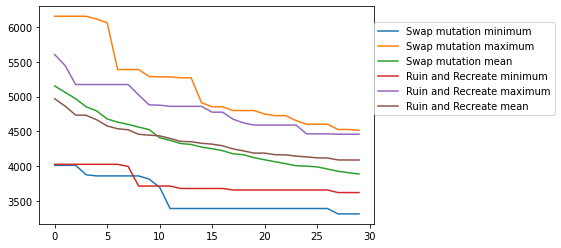

In [19]:
import numpy

def results():
    SwapList = []
    RuinNRecreateList = []
    
    for i in range(30):
        SwapList.append(swap(30))
        RuinNRecreateList.append(ruinAndRecreate(30))
        
        # turning both lists into numpy arrays because it works out max , min and average calculations
        Array1 = numpy.array(SwapList) 
        Array2 = numpy.array(RuinNRecreateList)

    plt.plot(Array1.min(axis=0))
    plt.plot(Array1.max(axis=0))
    plt.plot(Array1.mean(axis=0))
    
    plt.plot(Array2.min(axis=0))
    plt.plot(Array2.max(axis=0))
    plt.plot(Array2.mean(axis=0))
    plt.legend(["Swap mutation minimum","Swap mutation maximum", "Swap mutation mean", "Ruin and Recreate minimum", "Ruin and Recreate maximum", "Ruin and Recreate mean"], loc=(1,0.5))
    plt.show()
    
results()

The best mutation operator for the traveling saleman problem is the swap function because on the graph the mean value is seen traveling downwards at a faster and more reliable rate , where as the Ruin and recreate is slower. 

# Part 2 - EVOLUTIONARY COMPUTATION with Short Datasets

Importing csv files

In [20]:
distancesShort = pd.read_csv(r'distances_short_corrected.csv', header=None)
print(distancesShort)

     0    1    2    3    4
0    0  122  237  151  487
1  122    0  118   45  373
2  237  118    0  151  403
3  151   45  151    0  394
4  487  373  403  394    0


In [33]:
citiesShort = open(r'cities_short_corrected.csv')
test = citiesShort.read().splitlines()
print(test)

['Plymouth', 'Bristol', 'London', 'Cardiff', 'Edinburgh']


Task 2.1 - Generation of random solutions

In [40]:
def randRouteShort(distancesShort):
    routeShort = list(range(len(distancesShort)))
    #shuffeling cities
    random.shuffle(routeShort)
    return routeShort
print(randRouteShort(distancesShort)) # creating a random route


#working out length of route

def route_lengthShort(routeShort, distancesShort):
    lengthShort = 0 #sets the varaible 'length' to zero
    for i in range(len(routeShort)): # looks through the array
       lengthShort += distancesShort.iat[routeShort[i-1], routeShort[i]] # for how many cities are in the route, get distance of first city and next city
    
    return lengthShort

x = randRouteShort(distancesShort)
y = route_lengthShort(x, distancesShort)
print(x)
print(y)

[3, 2, 4, 1, 0]
[0, 1, 3, 2, 4]
1208


Task 2.2.1 - Ruin and Recreate mutation function

In [41]:
def ruinAndRecreateShort(iterations):
    
    RandList = []
    
    bestRouteShort = randRouteShort(distancesShort)
    bestRouteLengthShort = route_lengthShort(bestRouteShort, distancesShort)
    
    for i in range(iterations):
        route2 = randRouteShort(distancesShort)
        print(route2)
        routelength2 = route_lengthShort(route2, distancesShort)
        if routelength2 < bestRouteLengthShort:
            bestRouteLengthShort = routelength2
            bestRouteShort = route2
        RandList.append(bestRouteLengthShort) #iterates through and generates a new route , if it was better than previous routes it becomes the best route is kept till the next iteration 
    return RandList
print(ruinAndRecreateShort(30))

[2, 1, 3, 4, 0]
[3, 1, 4, 0, 2]
[4, 0, 2, 3, 1]
[3, 1, 2, 4, 0]
[3, 0, 4, 1, 2]
[2, 4, 0, 1, 3]
[4, 0, 2, 3, 1]
[0, 1, 4, 3, 2]
[1, 0, 3, 4, 2]
[0, 4, 3, 2, 1]
[1, 0, 2, 4, 3]
[2, 0, 3, 4, 1]
[4, 3, 2, 0, 1]
[4, 2, 1, 0, 3]
[0, 4, 2, 1, 3]
[1, 2, 3, 4, 0]
[3, 2, 4, 0, 1]
[2, 4, 1, 0, 3]
[1, 3, 4, 2, 0]
[0, 3, 4, 2, 1]
[0, 4, 1, 3, 2]
[3, 2, 4, 1, 0]
[3, 2, 0, 4, 1]
[4, 0, 3, 2, 1]
[1, 4, 3, 2, 0]
[0, 4, 2, 1, 3]
[2, 3, 4, 0, 1]
[1, 0, 3, 4, 2]
[2, 4, 3, 1, 0]
[1, 4, 2, 0, 3]
[1281, 1281, 1281, 1204, 1204, 1204, 1204, 1204, 1188, 1188, 1188, 1188, 1188, 1188, 1188, 1188, 1188, 1188, 1188, 1188, 1188, 1188, 1188, 1188, 1188, 1188, 1188, 1188, 1188, 1188]


Task 2.2.2 - Swap mutation function

In [43]:
def swapShort(iterations):
    print("swap Function") # for readability
    
    SwapList = []
    
    bestRouteShort = randRouteShort(distancesShort)
    bestRouteLengthShort = route_lengthShort(bestRouteShort, distancesShort)
    
    for i in range(iterations):
        newRouteShort = bestRouteShort.copy() # copies the values of bestRoute
        newRouteLengthShort = route_lengthShort(newRouteShort, distancesShort) #records the length of the new route, and gives something to compare what route is more fitter out of the bestroute and newroute
        
        print("Best route Short = ", bestRouteShort, ": Length Short = ", bestRouteLengthShort) # make sure it works
        
        newShortRoutePosition1 = random.randint(0, max(newRouteShort))
        newShortRoutePosition2 = random.randint(0, max(newRouteShort))
        
        
        newRouteShort[newShortRoutePosition1], newRouteShort[newShortRoutePosition2] = newRouteShort[newShortRoutePosition2], newRouteShort[newShortRoutePosition1]
        print("New Route Short = ", newRouteShort, ": Length Short= ", newRouteLengthShort)
        newRouteLengthShort = route_lengthShort(newRouteShort, distancesShort)
        
        if(bestRouteLengthShort > newRouteLengthShort):
            bestRouteShort = newRouteShort
            bestRouteLengthShort = newRouteLengthShort
        else:
            bestRouteShort = bestRouteShort
            bestRouteLengthShort = bestRouteLengthShort
        SwapList.append(bestRouteLengthShort)
        print("Best Route Short = ", bestRouteShort, ": Length Short= ", bestRouteLengthShort)
        
    print("Best Route Short = ", route_lengthShort(bestRouteShort, distancesShort))
        
    
    return SwapList

print(swapShort(30))

swap Function
Best route Short =  [0, 4, 3, 2, 1] : Length Short =  1272
New Route Short =  [0, 3, 4, 2, 1] : Length Short=  1272
Best Route Short =  [0, 3, 4, 2, 1] : Length Short=  1188
Best route Short =  [0, 3, 4, 2, 1] : Length Short =  1188
New Route Short =  [0, 3, 2, 4, 1] : Length Short=  1188
Best Route Short =  [0, 3, 4, 2, 1] : Length Short=  1188
Best route Short =  [0, 3, 4, 2, 1] : Length Short =  1188
New Route Short =  [0, 3, 2, 4, 1] : Length Short=  1188
Best Route Short =  [0, 3, 4, 2, 1] : Length Short=  1188
Best route Short =  [0, 3, 4, 2, 1] : Length Short =  1188
New Route Short =  [0, 3, 4, 1, 2] : Length Short=  1188
Best Route Short =  [0, 3, 4, 2, 1] : Length Short=  1188
Best route Short =  [0, 3, 4, 2, 1] : Length Short =  1188
New Route Short =  [1, 3, 4, 2, 0] : Length Short=  1188
Best Route Short =  [0, 3, 4, 2, 1] : Length Short=  1188
Best route Short =  [0, 3, 4, 2, 1] : Length Short =  1188
New Route Short =  [0, 1, 4, 2, 3] : Length Short=  1188


Task 2.3 - Visualisation of results 

swap Function
Best route =  [15, 19, 0, 10, 11, 16, 9, 5, 2, 1, 6, 3, 17, 7, 14, 12, 13, 18, 8, 4] : Length =  5115.7
New Route =  [15, 19, 0, 10, 11, 16, 9, 8, 2, 1, 6, 3, 17, 7, 14, 12, 13, 18, 5, 4] : Length =  5115.7
Best Route =  [15, 19, 0, 10, 11, 16, 9, 8, 2, 1, 6, 3, 17, 7, 14, 12, 13, 18, 5, 4] : Length =  4139.7
Best route =  [15, 19, 0, 10, 11, 16, 9, 8, 2, 1, 6, 3, 17, 7, 14, 12, 13, 18, 5, 4] : Length =  4139.7
New Route =  [15, 19, 0, 10, 11, 16, 9, 8, 2, 1, 6, 5, 17, 7, 14, 12, 13, 18, 3, 4] : Length =  4139.7
Best Route =  [15, 19, 0, 10, 11, 16, 9, 8, 2, 1, 6, 5, 17, 7, 14, 12, 13, 18, 3, 4] : Length =  4016.2
Best route =  [15, 19, 0, 10, 11, 16, 9, 8, 2, 1, 6, 5, 17, 7, 14, 12, 13, 18, 3, 4] : Length =  4016.2
New Route =  [15, 19, 0, 10, 11, 16, 9, 8, 7, 1, 6, 5, 17, 2, 14, 12, 13, 18, 3, 4] : Length =  4016.2
Best Route =  [15, 19, 0, 10, 11, 16, 9, 8, 7, 1, 6, 5, 17, 2, 14, 12, 13, 18, 3, 4] : Length =  3917.1
Best route =  [15, 19, 0, 10, 11, 16, 9, 8, 7, 1, 6, 

Best Route =  [15, 7, 19, 9, 10, 3, 11, 18, 4, 17, 12, 0, 1, 2, 13, 14, 8, 16, 5, 6] : Length =  4367.4
Best route =  [15, 7, 19, 9, 10, 3, 11, 18, 4, 17, 12, 0, 1, 2, 13, 14, 8, 16, 5, 6] : Length =  4367.4
New Route =  [15, 7, 19, 9, 10, 3, 11, 18, 2, 17, 12, 0, 1, 4, 13, 14, 8, 16, 5, 6] : Length =  4367.4
Best Route =  [15, 7, 19, 9, 10, 3, 11, 18, 4, 17, 12, 0, 1, 2, 13, 14, 8, 16, 5, 6] : Length =  4367.4
Best route =  [15, 7, 19, 9, 10, 3, 11, 18, 4, 17, 12, 0, 1, 2, 13, 14, 8, 16, 5, 6] : Length =  4367.4
New Route =  [15, 7, 19, 3, 10, 9, 11, 18, 4, 17, 12, 0, 1, 2, 13, 14, 8, 16, 5, 6] : Length =  4367.4
Best Route =  [15, 7, 19, 3, 10, 9, 11, 18, 4, 17, 12, 0, 1, 2, 13, 14, 8, 16, 5, 6] : Length =  4251.4
Best route =  [15, 7, 19, 3, 10, 9, 11, 18, 4, 17, 12, 0, 1, 2, 13, 14, 8, 16, 5, 6] : Length =  4251.4
New Route =  [15, 7, 19, 3, 17, 9, 11, 18, 4, 10, 12, 0, 1, 2, 13, 14, 8, 16, 5, 6] : Length =  4251.4
Best Route =  [15, 7, 19, 3, 10, 9, 11, 18, 4, 17, 12, 0, 1, 2, 13,

New Route =  [17, 19, 3, 5, 9, 0, 10, 16, 6, 1, 2, 12, 18, 15, 11, 7, 8, 14, 13, 4] : Length =  4439.2
Best Route =  [17, 19, 3, 5, 9, 0, 10, 16, 7, 1, 2, 12, 18, 15, 11, 6, 8, 14, 13, 4] : Length =  4439.2
Best route =  [17, 19, 3, 5, 9, 0, 10, 16, 7, 1, 2, 12, 18, 15, 11, 6, 8, 14, 13, 4] : Length =  4439.2
New Route =  [17, 19, 3, 5, 9, 0, 10, 16, 7, 1, 2, 12, 18, 15, 11, 6, 8, 14, 4, 13] : Length =  4439.2
Best Route =  [17, 19, 3, 5, 9, 0, 10, 16, 7, 1, 2, 12, 18, 15, 11, 6, 8, 14, 4, 13] : Length =  4420.8
Best route =  [17, 19, 3, 5, 9, 0, 10, 16, 7, 1, 2, 12, 18, 15, 11, 6, 8, 14, 4, 13] : Length =  4420.8
New Route =  [17, 19, 0, 5, 9, 3, 10, 16, 7, 1, 2, 12, 18, 15, 11, 6, 8, 14, 4, 13] : Length =  4420.8
Best Route =  [17, 19, 3, 5, 9, 0, 10, 16, 7, 1, 2, 12, 18, 15, 11, 6, 8, 14, 4, 13] : Length =  4420.8
Best route =  [17, 19, 3, 5, 9, 0, 10, 16, 7, 1, 2, 12, 18, 15, 11, 6, 8, 14, 4, 13] : Length =  4420.8
New Route =  [17, 19, 3, 5, 9, 0, 10, 16, 7, 1, 15, 12, 18, 2, 11, 

New Route =  [9, 13, 11, 16, 15, 3, 19, 17, 12, 8, 4, 6, 14, 10, 7, 2, 5, 18, 0, 1] : Length =  4352.7
Best Route =  [12, 13, 11, 16, 15, 3, 19, 17, 9, 8, 4, 6, 14, 10, 7, 2, 5, 18, 0, 1] : Length =  4352.7
Best route =  [12, 13, 11, 16, 15, 3, 19, 17, 9, 8, 4, 6, 14, 10, 7, 2, 5, 18, 0, 1] : Length =  4352.7
New Route =  [12, 13, 11, 16, 15, 3, 19, 17, 9, 7, 4, 6, 14, 10, 8, 2, 5, 18, 0, 1] : Length =  4352.7
Best Route =  [12, 13, 11, 16, 15, 3, 19, 17, 9, 8, 4, 6, 14, 10, 7, 2, 5, 18, 0, 1] : Length =  4352.7
Best Route =  4352.7
[18, 2, 11, 9, 0, 6, 7, 4, 16, 8, 14, 12, 19, 15, 10, 17, 3, 13, 1, 5]
[9, 14, 0, 5, 1, 7, 4, 2, 18, 19, 17, 12, 11, 3, 8, 16, 13, 15, 6, 10]
[8, 9, 4, 2, 15, 19, 10, 12, 11, 16, 6, 0, 18, 1, 14, 5, 13, 3, 17, 7]
[9, 19, 6, 10, 15, 17, 4, 8, 13, 18, 3, 12, 11, 7, 5, 1, 16, 0, 2, 14]
[16, 9, 14, 18, 0, 10, 5, 2, 8, 17, 1, 4, 15, 13, 11, 19, 12, 6, 3, 7]
[9, 6, 2, 0, 8, 10, 4, 5, 18, 1, 7, 19, 12, 16, 11, 15, 13, 17, 3, 14]
[19, 13, 7, 5, 17, 10, 11, 9, 3, 14

New Route =  [4, 0, 14, 5, 10, 3, 19, 7, 9, 11, 15, 17, 8, 12, 18, 16, 6, 2, 13, 1] : Length =  5517.6
Best Route =  [4, 12, 14, 5, 10, 3, 19, 7, 9, 11, 15, 17, 8, 0, 18, 16, 6, 2, 13, 1] : Length =  5517.6
Best route =  [4, 12, 14, 5, 10, 3, 19, 7, 9, 11, 15, 17, 8, 0, 18, 16, 6, 2, 13, 1] : Length =  5517.6
New Route =  [4, 12, 14, 5, 10, 3, 19, 7, 9, 1, 15, 17, 8, 0, 18, 16, 6, 2, 13, 11] : Length =  5517.6
Best Route =  [4, 12, 14, 5, 10, 3, 19, 7, 9, 1, 15, 17, 8, 0, 18, 16, 6, 2, 13, 11] : Length =  5468.8
Best route =  [4, 12, 14, 5, 10, 3, 19, 7, 9, 1, 15, 17, 8, 0, 18, 16, 6, 2, 13, 11] : Length =  5468.8
New Route =  [4, 12, 14, 5, 10, 3, 19, 7, 9, 1, 15, 17, 8, 0, 18, 16, 6, 2, 11, 13] : Length =  5468.8
Best Route =  [4, 12, 14, 5, 10, 3, 19, 7, 9, 1, 15, 17, 8, 0, 18, 16, 6, 2, 13, 11] : Length =  5468.8
Best route =  [4, 12, 14, 5, 10, 3, 19, 7, 9, 1, 15, 17, 8, 0, 18, 16, 6, 2, 13, 11] : Length =  5468.8
New Route =  [4, 12, 14, 5, 10, 3, 19, 7, 9, 1, 15, 0, 8, 17, 18, 1

Best Route =  [2, 1, 11, 18, 12, 10, 8, 4, 3, 17, 6, 5, 0, 15, 9, 16, 7, 13, 14, 19] : Length =  4321.4
Best route =  [2, 1, 11, 18, 12, 10, 8, 4, 3, 17, 6, 5, 0, 15, 9, 16, 7, 13, 14, 19] : Length =  4321.4
New Route =  [2, 1, 11, 18, 12, 14, 8, 4, 3, 17, 6, 5, 0, 15, 9, 16, 7, 13, 10, 19] : Length =  4321.4
Best Route =  [2, 1, 11, 18, 12, 10, 8, 4, 3, 17, 6, 5, 0, 15, 9, 16, 7, 13, 14, 19] : Length =  4321.4
Best route =  [2, 1, 11, 18, 12, 10, 8, 4, 3, 17, 6, 5, 0, 15, 9, 16, 7, 13, 14, 19] : Length =  4321.4
New Route =  [2, 1, 11, 18, 12, 10, 8, 15, 3, 17, 6, 5, 0, 4, 9, 16, 7, 13, 14, 19] : Length =  4321.4
Best Route =  [2, 1, 11, 18, 12, 10, 8, 4, 3, 17, 6, 5, 0, 15, 9, 16, 7, 13, 14, 19] : Length =  4321.4
Best route =  [2, 1, 11, 18, 12, 10, 8, 4, 3, 17, 6, 5, 0, 15, 9, 16, 7, 13, 14, 19] : Length =  4321.4
New Route =  [2, 1, 11, 18, 12, 10, 8, 0, 3, 17, 6, 5, 4, 15, 9, 16, 7, 13, 14, 19] : Length =  4321.4
Best Route =  [2, 1, 11, 18, 12, 10, 8, 0, 3, 17, 6, 5, 4, 15, 9, 1

New Route =  [3, 16, 2, 12, 17, 10, 11, 15, 19, 18, 13, 7, 8, 6, 1, 9, 0, 5, 4, 14] : Length =  3687.6
Best Route =  [3, 6, 2, 12, 17, 10, 11, 15, 19, 18, 13, 7, 8, 16, 1, 9, 0, 5, 4, 14] : Length =  3687.6
Best route =  [3, 6, 2, 12, 17, 10, 11, 15, 19, 18, 13, 7, 8, 16, 1, 9, 0, 5, 4, 14] : Length =  3687.6
New Route =  [3, 6, 2, 12, 17, 10, 11, 15, 19, 18, 13, 7, 8, 16, 1, 9, 0, 5, 4, 14] : Length =  3687.6
Best Route =  [3, 6, 2, 12, 17, 10, 11, 15, 19, 18, 13, 7, 8, 16, 1, 9, 0, 5, 4, 14] : Length =  3687.6
Best route =  [3, 6, 2, 12, 17, 10, 11, 15, 19, 18, 13, 7, 8, 16, 1, 9, 0, 5, 4, 14] : Length =  3687.6
New Route =  [3, 6, 2, 12, 17, 10, 11, 15, 19, 18, 13, 7, 1, 16, 8, 9, 0, 5, 4, 14] : Length =  3687.6
Best Route =  [3, 6, 2, 12, 17, 10, 11, 15, 19, 18, 13, 7, 8, 16, 1, 9, 0, 5, 4, 14] : Length =  3687.6
Best route =  [3, 6, 2, 12, 17, 10, 11, 15, 19, 18, 13, 7, 8, 16, 1, 9, 0, 5, 4, 14] : Length =  3687.6
New Route =  [3, 6, 2, 12, 17, 5, 11, 15, 19, 18, 13, 7, 8, 16, 1, 

New Route =  [5, 4, 1, 15, 7, 14, 13, 6, 9, 0, 11, 10, 12, 18, 17, 2, 19, 16, 3, 8] : Length =  5333.4
Best Route =  [5, 4, 1, 15, 7, 14, 13, 6, 9, 0, 11, 10, 12, 18, 17, 2, 19, 16, 3, 8] : Length =  5333.4
Best route =  [5, 4, 1, 15, 7, 14, 13, 6, 9, 0, 11, 10, 12, 18, 17, 2, 19, 16, 3, 8] : Length =  5333.4
New Route =  [5, 4, 1, 15, 7, 14, 13, 6, 9, 0, 11, 8, 12, 18, 17, 2, 19, 16, 3, 10] : Length =  5333.4
Best Route =  [5, 4, 1, 15, 7, 14, 13, 6, 9, 0, 11, 10, 12, 18, 17, 2, 19, 16, 3, 8] : Length =  5333.4
Best route =  [5, 4, 1, 15, 7, 14, 13, 6, 9, 0, 11, 10, 12, 18, 17, 2, 19, 16, 3, 8] : Length =  5333.4
New Route =  [5, 4, 1, 15, 7, 14, 13, 10, 9, 0, 11, 6, 12, 18, 17, 2, 19, 16, 3, 8] : Length =  5333.4
Best Route =  [5, 4, 1, 15, 7, 14, 13, 6, 9, 0, 11, 10, 12, 18, 17, 2, 19, 16, 3, 8] : Length =  5333.4
Best route =  [5, 4, 1, 15, 7, 14, 13, 6, 9, 0, 11, 10, 12, 18, 17, 2, 19, 16, 3, 8] : Length =  5333.4
New Route =  [5, 4, 1, 15, 7, 14, 13, 6, 9, 10, 11, 0, 12, 18, 17, 

New Route =  [1, 3, 18, 7, 6, 8, 19, 14, 12, 11, 15, 4, 13, 5, 10, 0, 9, 16, 17, 2] : Length =  4516.4
Best Route =  [1, 3, 18, 7, 15, 8, 19, 14, 12, 11, 6, 4, 13, 5, 10, 0, 9, 16, 17, 2] : Length =  4516.4
Best route =  [1, 3, 18, 7, 15, 8, 19, 14, 12, 11, 6, 4, 13, 5, 10, 0, 9, 16, 17, 2] : Length =  4516.4
New Route =  [1, 3, 18, 7, 15, 8, 19, 14, 12, 11, 6, 17, 13, 5, 10, 0, 9, 16, 4, 2] : Length =  4516.4
Best Route =  [1, 3, 18, 7, 15, 8, 19, 14, 12, 11, 6, 4, 13, 5, 10, 0, 9, 16, 17, 2] : Length =  4516.4
Best route =  [1, 3, 18, 7, 15, 8, 19, 14, 12, 11, 6, 4, 13, 5, 10, 0, 9, 16, 17, 2] : Length =  4516.4
New Route =  [1, 3, 18, 7, 15, 8, 19, 0, 12, 11, 6, 4, 13, 5, 10, 14, 9, 16, 17, 2] : Length =  4516.4
Best Route =  [1, 3, 18, 7, 15, 8, 19, 14, 12, 11, 6, 4, 13, 5, 10, 0, 9, 16, 17, 2] : Length =  4516.4
Best route =  [1, 3, 18, 7, 15, 8, 19, 14, 12, 11, 6, 4, 13, 5, 10, 0, 9, 16, 17, 2] : Length =  4516.4
New Route =  [1, 4, 18, 7, 15, 8, 19, 14, 12, 11, 6, 3, 13, 5, 10, 

Best Route =  [10, 1, 9, 19, 6, 12, 18, 3, 5, 4, 16, 13, 14, 2, 0, 7, 11, 15, 17, 8] : Length =  3721.4
Best route =  [10, 1, 9, 19, 6, 12, 18, 3, 5, 4, 16, 13, 14, 2, 0, 7, 11, 15, 17, 8] : Length =  3721.4
New Route =  [10, 1, 9, 18, 6, 12, 19, 3, 5, 4, 16, 13, 14, 2, 0, 7, 11, 15, 17, 8] : Length =  3721.4
Best Route =  [10, 1, 9, 18, 6, 12, 19, 3, 5, 4, 16, 13, 14, 2, 0, 7, 11, 15, 17, 8] : Length =  3688.4
Best route =  [10, 1, 9, 18, 6, 12, 19, 3, 5, 4, 16, 13, 14, 2, 0, 7, 11, 15, 17, 8] : Length =  3688.4
New Route =  [10, 1, 9, 18, 6, 12, 19, 3, 5, 4, 16, 13, 11, 2, 0, 7, 14, 15, 17, 8] : Length =  3688.4
Best Route =  [10, 1, 9, 18, 6, 12, 19, 3, 5, 4, 16, 13, 14, 2, 0, 7, 11, 15, 17, 8] : Length =  3688.4
Best route =  [10, 1, 9, 18, 6, 12, 19, 3, 5, 4, 16, 13, 14, 2, 0, 7, 11, 15, 17, 8] : Length =  3688.4
New Route =  [10, 1, 9, 18, 6, 12, 19, 14, 5, 4, 16, 13, 3, 2, 0, 7, 11, 15, 17, 8] : Length =  3688.4
Best Route =  [10, 1, 9, 18, 6, 12, 19, 3, 5, 4, 16, 13, 14, 2, 0, 

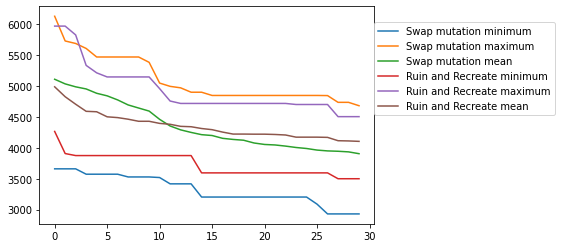

In [44]:
import numpy

def resultsShort():
    SwapList = []
    RuinNRecreateList = []
    
    for i in range(30):
        SwapList.append(swapShort(30))
        RuinNRecreateList.append(ruinAndRecreateShort(30))
        
        # turning both lists into numpy arrays because it works out max , min and average calculations
        Array1 = numpy.array(SwapList) 
        Array2 = numpy.array(RuinNRecreateList)

    plt.plot(Array1.min(axis=0))
    plt.plot(Array1.max(axis=0))
    plt.plot(Array1.mean(axis=0))
    
    plt.plot(Array2.min(axis=0))
    plt.plot(Array2.max(axis=0))
    plt.plot(Array2.mean(axis=0))
    plt.legend(["Swap mutation minimum","Swap mutation maximum", "Swap mutation mean", "Ruin and Recreate minimum", "Ruin and Recreate maximum", "Ruin and Recreate mean"], loc=(1,0.5))
    plt.show()
    
results()